# Other modules for geoscientists

Nikolay Koldunov

koldunovn@gmail.com

This is part of [**Python for Geosciences**](https://github.com/koldunovn/python_for_geosciences) notes.

=============

Some of the things will not work on ZMAW computers (Iris, Cartopy).

In [31]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np

## Cartopy

[Cartopy](http://scitools.org.uk/cartopy/) is a library providing cartographic tools for python.

Some of the key features of cartopy are:

* object oriented projection definitions
* point, line, polygon and image transformations between projections
* integration to expose advanced mapping in matplotlib with a simple and intuitive interface

Simple plot:

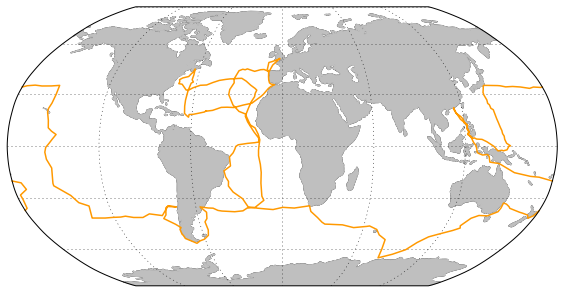

In [16]:
fig, ax = make_cartopy(projection=ccrs.Robinson(), resolution='110m')
_ = ax.plot(lon, lat, transform=ccrs.Geodetic(), **kw)

In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

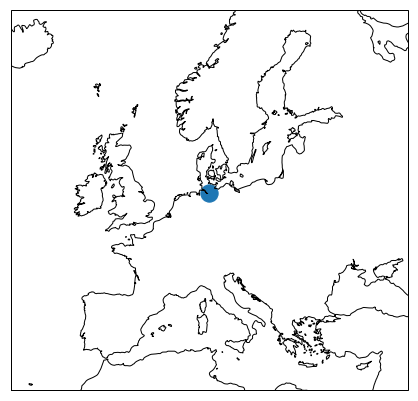

In [5]:
plt.figure(figsize=(8,7))
lat = 53.565278
lon = 10.001389
ax = plt.axes(projection=ccrs.Mercator())
ax.set_extent([-20.,40.,32.,64.])
ax.coastlines(resolution='50m')
ax.scatter(lon,lat,300,transform=ccrs.Geodetic())

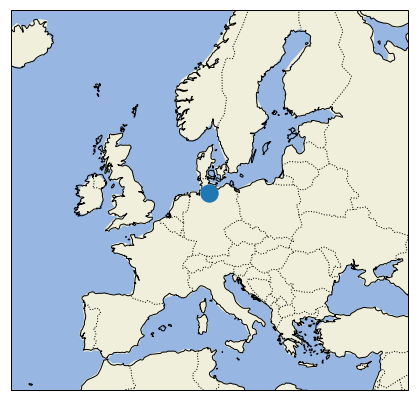

In [7]:

plt.figure(figsize=(8,7))
ax = plt.axes(projection=ccrs.Mercator())
ax.set_extent([-20.,40.,32.,64.])
ax.coastlines(resolution='50m',zorder=9)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND)
#ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

ax.scatter(lon,lat,300,transform=ccrs.Geodetic(),zorder=10)

In [8]:
from cartopy.io.img_tiles import GoogleTiles, OSM,QuadtreeTiles,MapQuestOpenAerial,MapQuestOSM

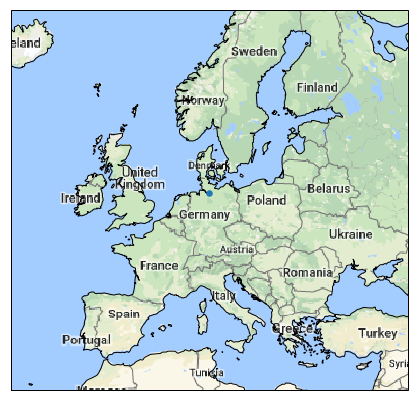

In [9]:
plt.figure(figsize=(8,7))
ax = plt.axes(projection=ccrs.Mercator())
ax.set_extent([-20.,40.,32.,64.])
ax.coastlines(resolution='50m',zorder=9)
ax.scatter(lon,lat,30,transform=ccrs.PlateCarree(),zorder=10)
gg_tiles = GoogleTiles()
ax.add_image(gg_tiles, 3)

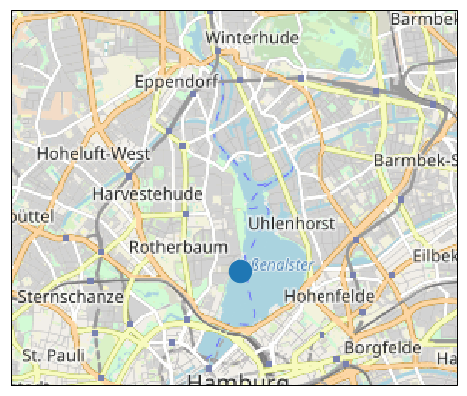

In [10]:
plt.figure(figsize=(8,7))
ax = plt.axes(projection=ccrs.Mercator())
ax.set_extent([9.95,10.05,53.55,53.6])
ax.scatter(lon,lat,500,transform=ccrs.Geodetic(),zorder=10)
gg_tiles = OSM()
ax.add_image(gg_tiles, 12)

In [12]:
from netCDF4 import Dataset
fl = Dataset('./air.2m.gauss.2016.nc')
air = fl.variables['air'][0,:,:]
lat = fl.variables['lat'][:]
lon = fl.variables['lon'][:]

In [13]:
from cartopy.util import add_cyclic_point


In [14]:
air_cyc, lon_cyc = add_cyclic_point(air, coord=lon)


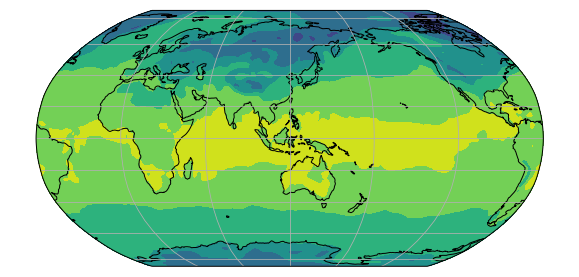

In [15]:
plt.figure(figsize=(10,5))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=120))
ax.coastlines()
gl = ax.gridlines(draw_labels=False) # Only PlateCarree and Mercator plots are currently supported.
ax.contourf(lon_cyc,lat,air_cyc, transform=ccrs.PlateCarree())

# Pydap

[Pydap](http://www.pydap.org/) is a pure Python library implementing the Data Access Protocol, also known as DODS or OPeNDAP. You can use Pydap as a client to access hundreds of scientific datasets in a transparent and efficient way through the internet; or as a server to easily distribute your data from a variety of formats.

In [16]:
from pydap.client import open_url

We are going to access [sea ice data](http://icdc.zmaw.de/seaiceconcentration_asi_amsre.html?&L=1) from [CliSAP-Integrated Climate Data Center (ICDC)](http://icdc.zmaw.de/)

In [21]:
dataset = open_url(u"http://icdc.cen.uni-hamburg.de/thredds/dodsC/ssmi_asi_icecon_arc2011")

In [23]:
print(dataset)

<DatasetType with children 'latitude', 'longitude', 'time', 'sea_ice_area_fraction', 'land'>


In [25]:
ice = dataset['sea_ice_area_fraction']

In [26]:
ice.shape

(365, 896, 608)

In [35]:
ice.attributes

{'_FillValue': 103,
 'add_offset': 0.0,
 'coordinates': 'latitude longitude time',
 'long_name': 'sea-ice concentration',
 'missing_value': 101,
 'scale_factor': 1.0,
 'standard_name': 'sea_ice_area_fraction',
 'units': 'percent'}

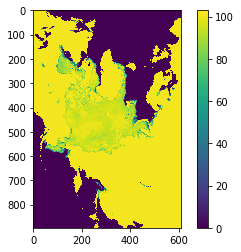

In [36]:
plt.imshow(np.squeeze(ice[0,:,:]))
plt.colorbar()

## F2PY

The [F2PY](http://www.f2py.com/) project is created to unify the efforts of supporting easy connection between Fortran and Python languages. Example below is from [Using Python and FORTRAN with F2py](http://www.f2py.com/).

Create FORTRAN file (use %%file instead of %%writefile if you on IPython < 1.0):

In [37]:
%%writefile FIB1.F
C FILE: FIB1.F
      SUBROUTINE FIB(A,N)
C
C     CALCULATE FIRST N FIBONACCI NUMBERS
C
      INTEGER N
      REAL*8 A(N)
      DO I=1,N
         IF (I.EQ.1) THEN
            A(I) = 0.0D0
         ELSEIF (I.EQ.2) THEN
            A(I) = 1.0D0
         ELSE 
            A(I) = A(I-1) + A(I-2)
         ENDIF
      ENDDO
      END
C END FILE FIB1.F

Writing FIB1.F


Compile it with f2py:

In [38]:
!f2py -c -m --fcompiler=gnu95 fib1 FIB1.F

running build
running config_cc
unifing config_cc, config, build_clib, build_ext, build commands --compiler options
running config_fc
unifing config_fc, config, build_clib, build_ext, build commands --fcompiler options
running build_src
build_src
building extension "fib1" sources
f2py options: []
f2py:> /var/folders/yq/03v059jn4sg2xhnhpnrqkgcc0000gn/T/tmprf2kbptk/src.macosx-10.7-x86_64-3.6/fib1module.c
creating /var/folders/yq/03v059jn4sg2xhnhpnrqkgcc0000gn/T/tmprf2kbptk/src.macosx-10.7-x86_64-3.6
Reading fortran codes...
	Reading file 'FIB1.F' (format:fix,strict)
Post-processing...
	Block: fib1
			Block: fib
Post-processing (stage 2)...
Building modules...
	Building module "fib1"...
		Constructing wrapper function "fib"...
		  fib(a,[n])
	Wrote C/API module "fib1" to file "/var/folders/yq/03v059jn4sg2xhnhpnrqkgcc0000gn/T/tmprf2kbptk/src.macosx-10.7-x86_64-3.6/fib1module.c"
  adding '/var/folders/yq/03v059jn4sg2xhnhpnrqkgcc0000gn/T/tmprf2kbptk/src.macosx-10.7-x86_64-3.6/fortranobject.c

Import resulting **fib1.so** as python library:

In [39]:
import fib1

Read some auto generated documentation:

In [41]:
print(fib1.__doc__)
print(fib1.fib.__doc__)

This module 'fib1' is auto-generated with f2py (version:2).
Functions:
  fib(a,n=len(a))
.
fib(a,[n])

Wrapper for ``fib``.

Parameters
----------
a : input rank-1 array('d') with bounds (n)

Other Parameters
----------------
n : input int, optional
    Default: len(a)



Use *fib* function:

In [42]:
import numpy as np

In [45]:
a=np.zeros(15,'d') 
fib1.fib(a) 
a 

array([   0.,    1.,    1.,    2.,    3.,    5.,    8.,   13.,   21.,
         34.,   55.,   89.,  144.,  233.,  377.])